In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('New_LIFE.Merged.D.A.November.11.2024.csv')
df.head()

,V1,MaskID,Time,TimeN,days_accel,valid_days,minutes_wear,minutes_nonwear,activity_total,steps_total,...,filter_$,ZTGR1,ZTGR2,ZTQWB,Zst,Zmin760,HEI,ZLDL_CHOL_CALCULATION,Unnamed: 962,New_HEI
0,0,10020,SV1,1,-10,6,711.1666667,642.3333333,102872.5,2634.833333,...,0,,,,0.03709511,0.518077178,0.805555556,0.820680713,NaN,0.805556
1,1,10020,F06,2,176,4,726.75,713.25,63984,1641,...,0,,,,-0.605569254,-0.135199648,,0.820680713,NaN,0.805556
2,2,10020,F12,3,358,5,717.8,609.4,81706.6,1760,...,1,0.342943633,0.381572466,0.557505879,-0.528617659,-0.249706598,,0.820680713,NaN,0.805556
3,3,10020,F18,4,,,,,,,...,0,,,,,,,0.820680713,NaN,0.805556
4,4,10020,F24,5,714,1,815,625,129339,3475,...,0,,,,0.580390609,0.129047158,,0.820680713,NaN,0.805556


In [5]:
# Select relevant columns for correlation
correlation_columns = ['Race', 'MVPA', 'Zsum_PSQI', 'ZSmoke', 'HEI', 
                       'New_HEI', 'ZBMI', 'ZMetSBP', 'ZMetSGlucose', 
                       'LDL_CHOL_CALCULATION']

In [13]:
# Convert to numeric, replacing errors with NaN
for col in correlation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [14]:
#Drop rows where both HEI scores are missing to ensure a clean correlation matrix
cleaned_df = df[correlation_columns].dropna(how='all')

In [15]:
correlation_matrix = cleaned_df.corr()

In [16]:
correlation_matrix.to_csv('Updated_Correlation_Table.csv')
print("Updated correlation table saved as 'Updated_Correlation_Table.csv'.")

Updated correlation table saved as 'Updated_Correlation_Table.csv'.


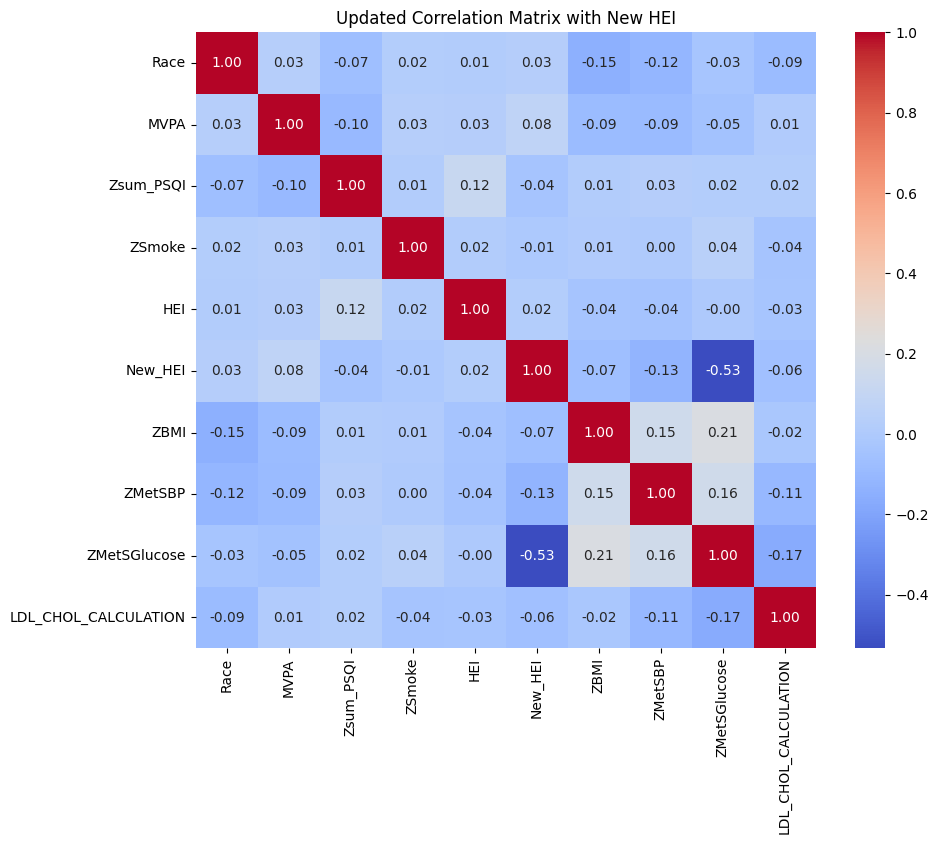

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Updated Correlation Matrix with New HEI")
plt.show()